<h1>  Exploratory Data Analysis (EDA) in Python

# **Introduction**


Exploratory Data Analysis of the famous Iris dataset.

The features present in the dataset are:

    Sepal Width
    Sepal Length
    Petal Width
    Petal Length
The target "species" has 3 classes namely 'setosa', 'versicolor', and 'virginica'.



initial EDA

How: Using powerfull python moduls [pandas, matplotlib, and seaborn]


In [1]:
# importing pandas, and other necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# **Load the dataset**

In [2]:
df=sns.load_dataset('iris')

In [3]:
#Alternative
'''
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris_df=pd.DataFrame(X, columns=iris.feature_names)
iris_df['target']=y
'''

"\nfrom sklearn import datasets\niris = datasets.load_iris()\nX = iris.data\ny = iris.target\niris_df=pd.DataFrame(X, columns=iris.feature_names)\niris_df['target']=y\n"

In [8]:
column_names = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df = pd.read_csv("iris.data", names=column_names)

# **A first look and non-graphical EDA**

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


More details: the types of variables

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
np.unique(df["class"], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [21]:
cls_names = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df["class"] = df["class"].apply(lambda x: cls_names[x])

In [22]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Check the null/na values 

In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

**What are the stats of the variables?**

In [24]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Are the classes (species) balanced?

In [26]:
df['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

## Correlation Between Variables

In [27]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


# **Graphical EDA**

Let's start from where we reached for the non-graphical EDA


## **Are the classes (species) balanced?**

### Using pandas

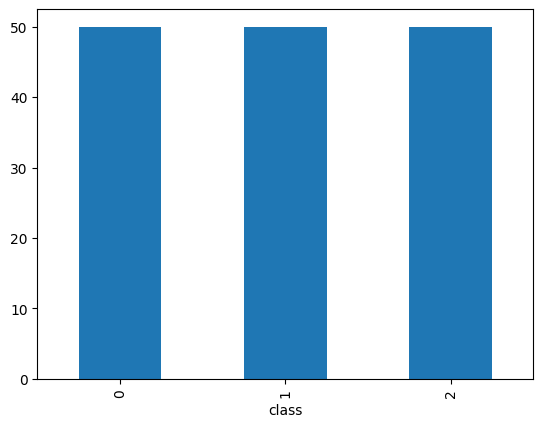

In [29]:
df["class"].value_counts().plot.bar()
plt.savefig("class_hist.png")

### Using matplotlib

<BarContainer object of 3 artists>

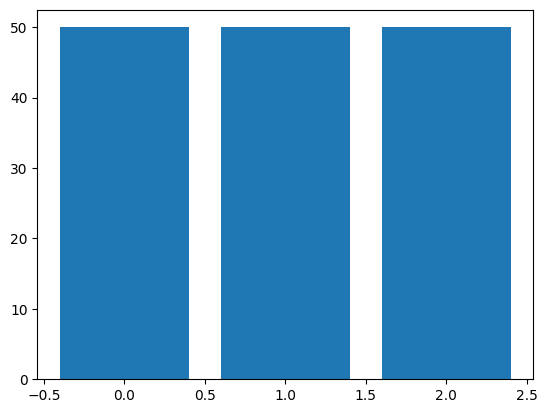

In [30]:
#we can use bar chart
counts = df["class"].value_counts()
plt.bar(counts.index, counts.values)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

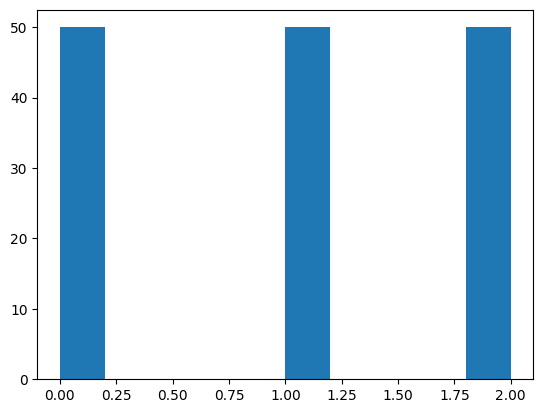

In [31]:
#one way using histogram :)
plt.hist(df['class'])

### Using seaborn

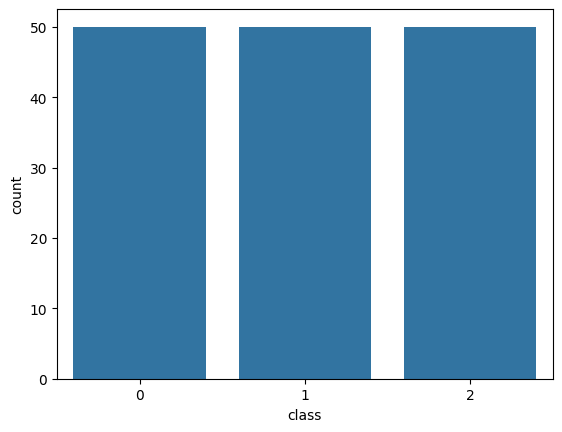

In [32]:
sns.countplot(x = df['class']);

### What we can conclude:


- Classes are balanced
- It is safe to use different classification accuracy metrics
- No pre-processing setps are required to address data imbalance (augmentation, oversampling, downsampling) 
- ...

## **Comparison graphs**

### Scatterplots

What?
- use a Cartesian coordinates system to display values of typically two variables for a set of data

Why?
- show the relationship between two variables

Let's try an example:

Showing the scatterplot between the features 'sepal_length' and 'sepal_width'

### Scatterplot using pandas

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

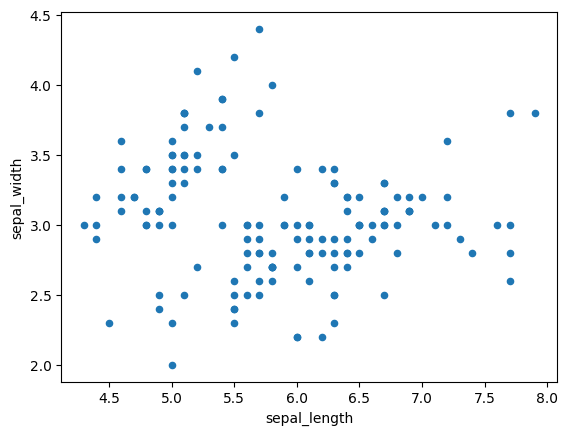

In [33]:
df.plot.scatter('sepal_length','sepal_width')

### Scatterplot using matplotlib

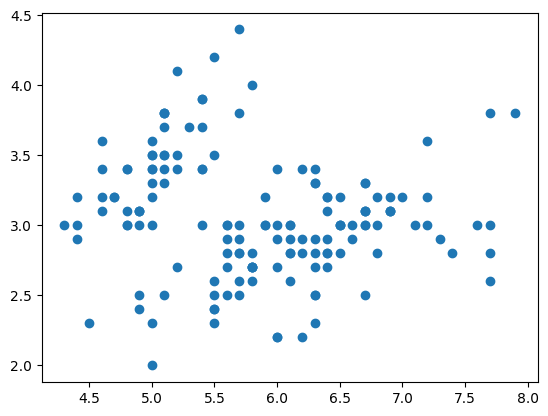

In [34]:
plt.scatter('sepal_length', 'sepal_width', data=df)

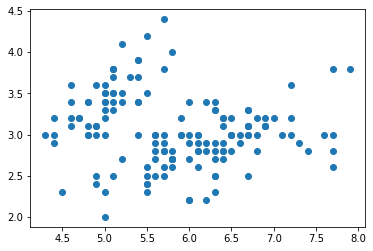

In [18]:
plt.scatter(df['sepal_length'], df['sepal_width'])

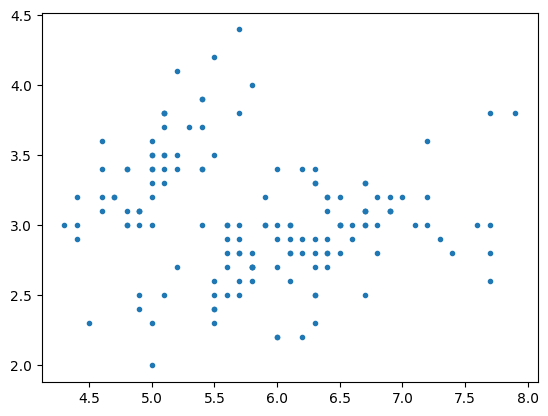

In [35]:
#using plt
plt.plot('sepal_length', 'sepal_width', data=df, marker='.',linestyle='none')

### Scatterplot using seaborn

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

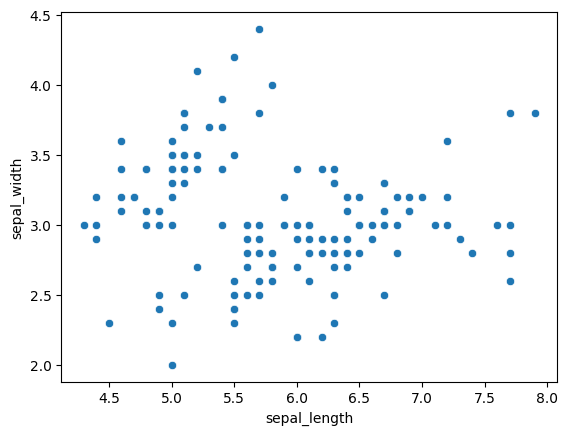

In [36]:
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width'])
#or sns.scatter('sepal_length', 'sepal_width', data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

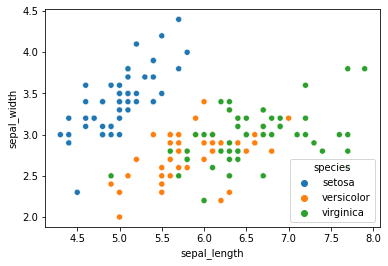

In [35]:
# With respect to the target class (species)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue=df['species'], data=df)

### What we can conclude:

- The iris-setosa species have smaller sepal length but higher width. 
- Versicolor lies in almost middle for length as well as width.  
- Virginica has larger sepal lengths and smaller sepal widths.

** As seen above, different tools could be used, from now on only seaborn is shown and others are lift for you to search how to do it
 

## **Correlogram**

Correlogram: AKS correlation matrix, to analyse the relationship between each pair of numeric variables

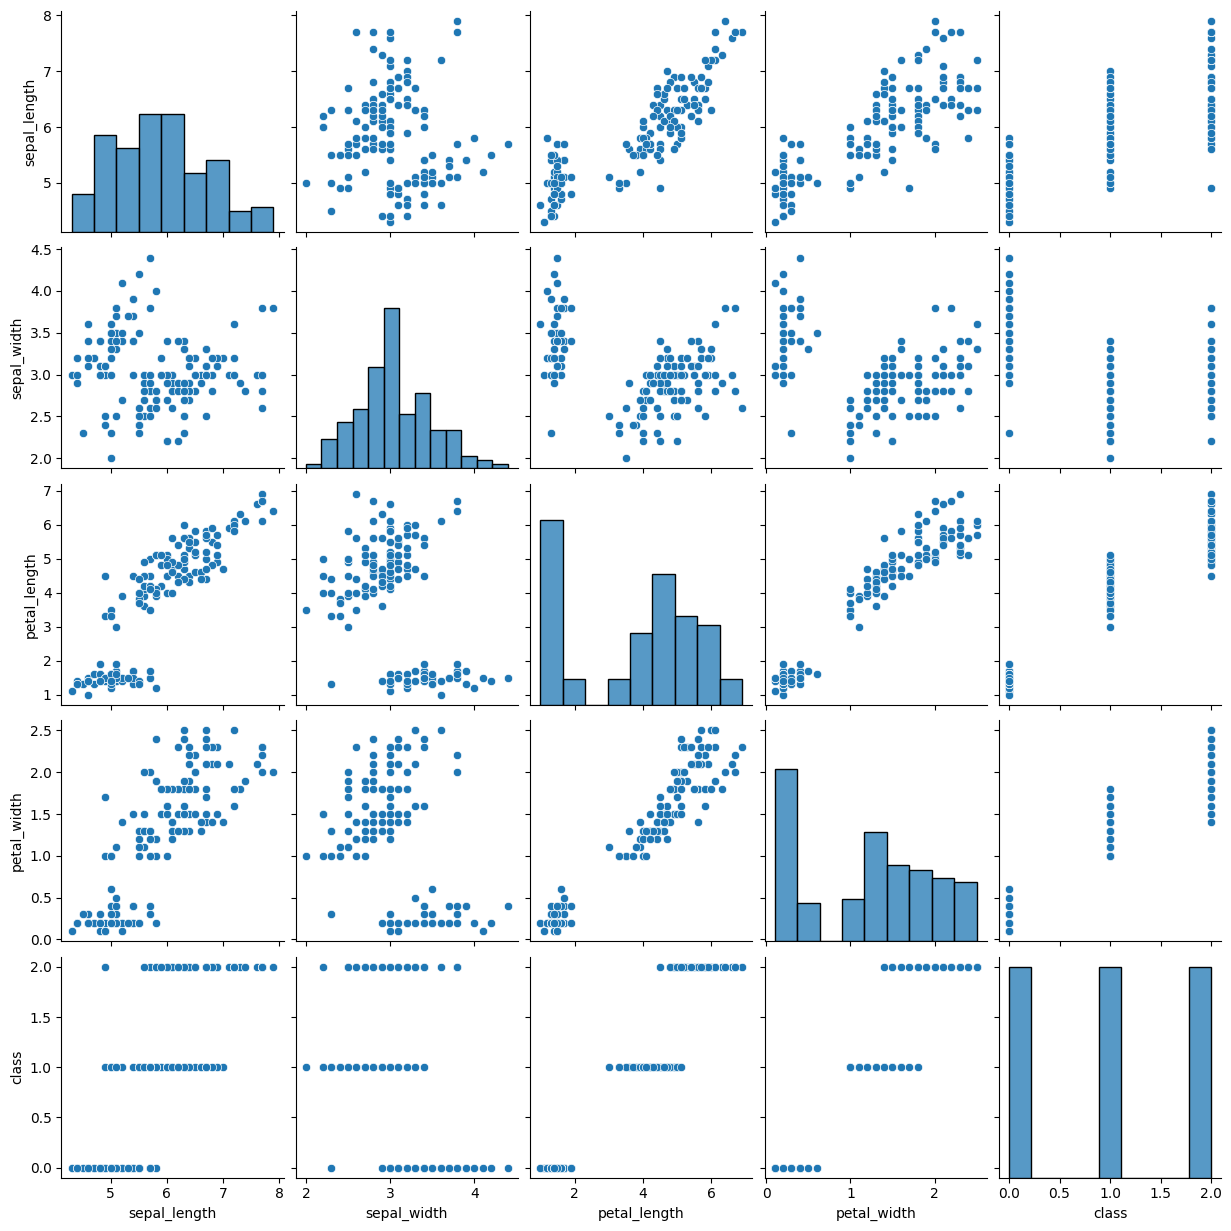

In [37]:
sns.pairplot(df)

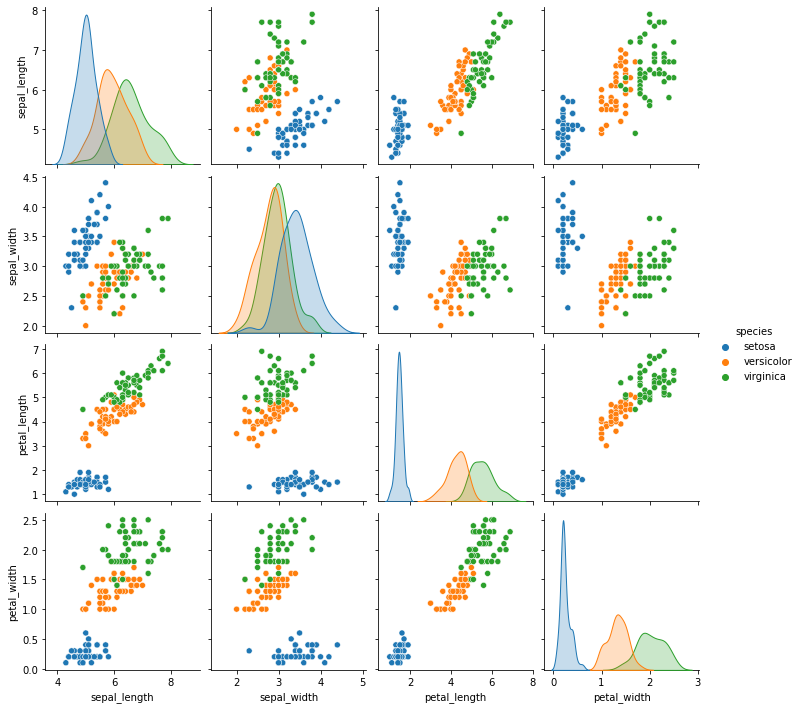

In [24]:
sns.pairplot(df,hue="species")

### What we can conclude:

- Two clusters for the comparison between petal width and length.
- Setosa has the smallest petal length as well as petal widths 
- Versicolor has average petal length and petal width 
- Virginica has the highest petal length as well as petal width.
- Setosa has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. 
- Versicolor has average dimensions whether it is sepal or petal. 
- Virginica has high petal width and length while it has small sepal width but large sepal length.

## **Heatmap**


Further, we can visualise this correlation using a heatmap.

Heatmap: a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors

useful to see which intersections of the categorical values, have higher concentration of the data compared to the others




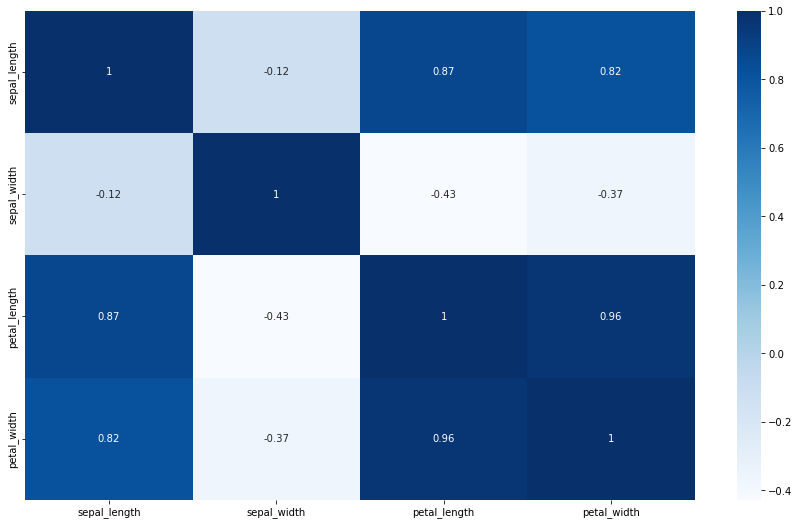

In [25]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

From the above heatmap, we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

**Histograms and distributions**

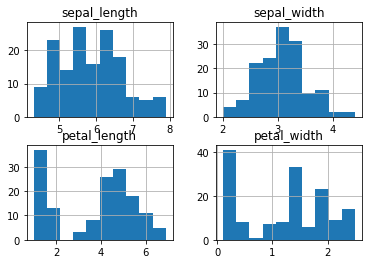

In [26]:
df.hist();

**Boxplots and violins**

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

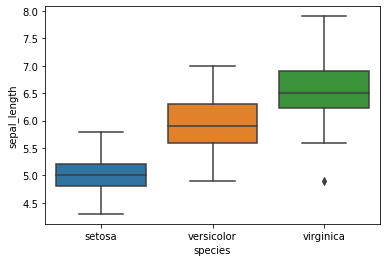

In [27]:
sns.boxplot(x='species', y='sepal_length', data=df)

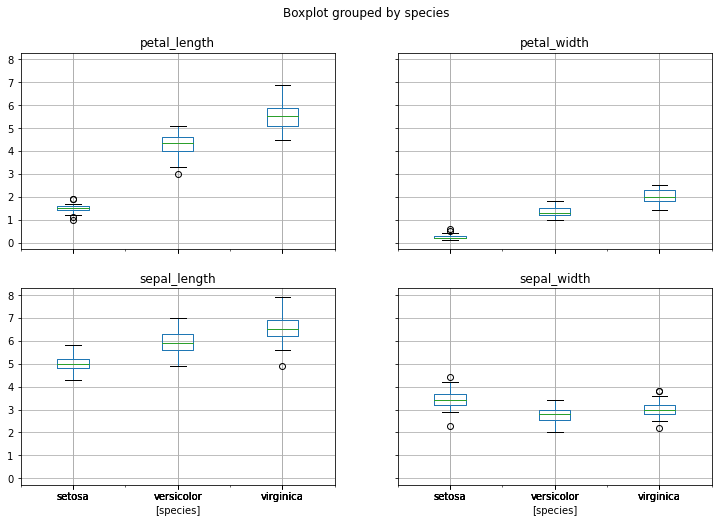

In [28]:
df.boxplot(by="species", figsize=(12, 8));

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

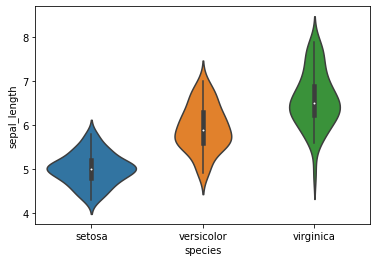

In [29]:
sns.violinplot(x='species', y='sepal_length', data=df)